In [42]:
# Importing all the  libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,gradient_boosting
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [43]:
#Loading the data 
av=pd.read_csv('avacado.csv')
print(av)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0             0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1             1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2             2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3             3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4             4.0  29-11-2015          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
16463         NaN         NaN           NaN           NaN      NaN        NaN   
16464         NaN         NaN           NaN           NaN      NaN        NaN   
16465         NaN         NaN           NaN           NaN      NaN        NaN   
16466         NaN         NaN           NaN           NaN      NaN        NaN   
16467         NaN         NaN           NaN           NaN      NaN        NaN   

         4770  Total Bags  

In [44]:
# Checking total rows and total columns
av.shape

(16468, 14)

In [45]:
av.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [46]:
av.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

<AxesSubplot:>

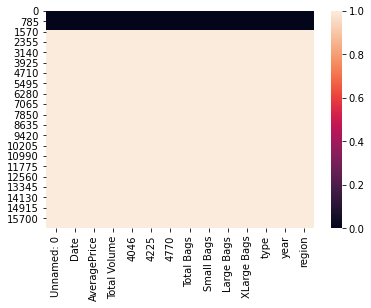

In [47]:
#Checking Null values using heatmap
sns.heatmap(av.isnull())

##### Here, I can find out that there is many null values present in the dataset.so,now I am going to drop all the null values from the data.

In [48]:
# Dropping all the null values from the data
df=av.dropna(how='all')
print(df)

      Unnamed: 0        Date  AveragePrice  Total Volume      4046       4225  \
0            0.0  27-12-2015          1.33      64236.62   1036.74   54454.85   
1            1.0  20-12-2015          1.35      54876.98    674.28   44638.81   
2            2.0  13-12-2015          0.93     118220.22    794.70  109149.67   
3            3.0  06-12-2015          1.08      78992.15   1132.00   71976.41   
4            4.0  29-11-2015          1.28      51039.60    941.48   43838.39   
...          ...         ...           ...           ...       ...        ...   
1512        10.0  16-10-2016          1.39     190846.01  57529.11   56366.66   
1513        11.0  09-10-2016          1.51     178235.75  43325.87   52189.61   
1514        12.0  02-10-2016          1.48     178410.82  46364.75   52893.38   
1515        13.0  25-09-2016          1.47     189131.52  54110.79   53593.58   
1516        14.0  18-09-2016          1.43     182978.30  43116.41   54193.42   

          4770  Total Bags 

#### After dropping all the null values we got the new data and saved in df.

In [49]:
df.dtypes.isnull()

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [50]:
#checking the mean of price for each year 
df.groupby('year')['AveragePrice'].mean()

year
2015.0    1.060110
2016.0    1.151498
Name: AveragePrice, dtype: float64

##### From this i have found that in 2016 Avacado price was higher then 2015.

In [51]:
#finding how much type of avacado is sell
df.groupby('year')['type'].value_counts()

year    type        
2015.0  conventional    1270
2016.0  conventional     247
Name: type, dtype: int64

#### The amount of avacado sold is higher in 2015 then compare to 2016.

In [52]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


## visualizing the data

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

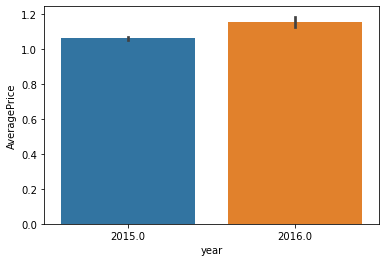

In [53]:
#Checking which year had max price
sns.barplot(x='year',y='AveragePrice',data=df)

#### 2016 has the maximum price as compared to 2015

## Add Month Column

In [54]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11


<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

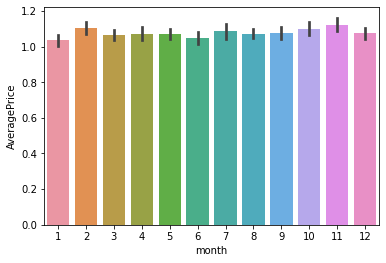

In [55]:
#Checking which month had max 
sns.barplot(x='month',y='AveragePrice',data=df)

#### February,September and October are the month where max no of average price is there, but the thing is almost for whole year the price is almost same for the avocado .

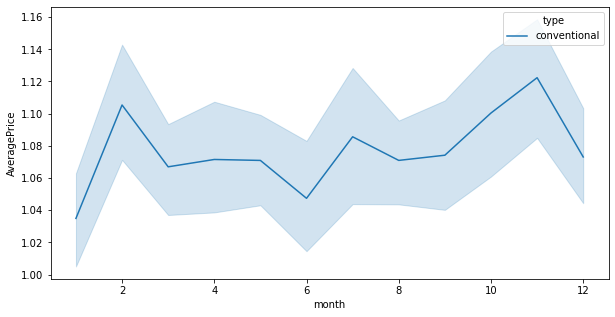

In [56]:
plt.figure(figsize=(10,5))
sns.lineplot(x='month',y='AveragePrice',hue= 'type',data=df)
plt.show()

#### *There is hike between month 8–10 in avocado.
#### *Also,conventional avocado is varying in term of price as seen in line plot because in starting the price is high but then it get decrease.

# Plotting Histogram

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>],
       [<AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>]], dtype=object)

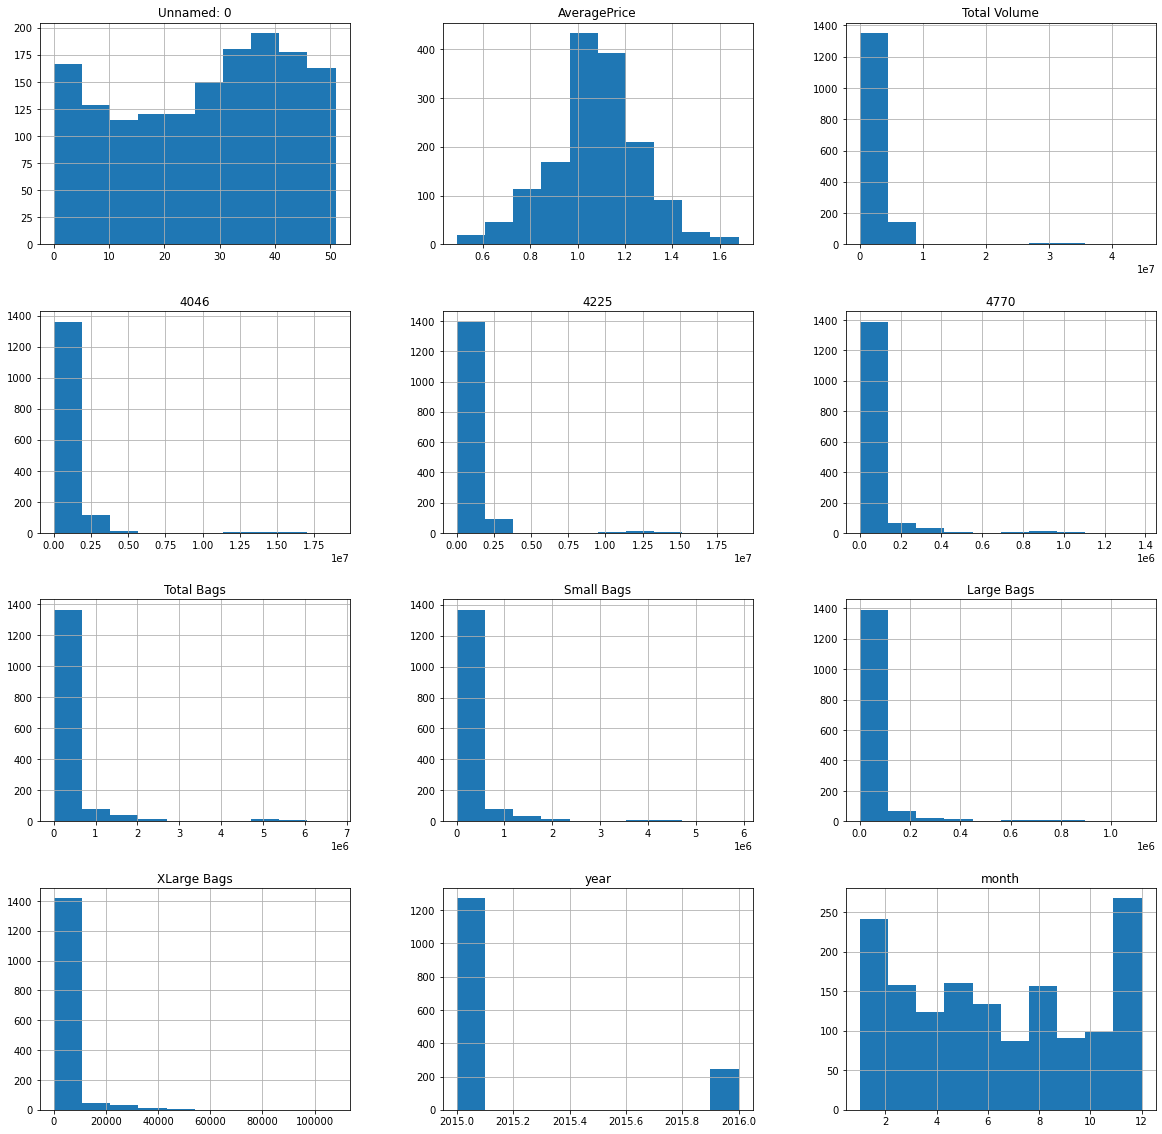

In [57]:
#plotting histogram fro univariate analyste and to get normal distribution
df.hist(figsize=(20,20))

In [58]:
df.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
month           0.101439
dtype: float64

In [59]:
#making the skew to less than or equal to 0.55 to get the better prediction
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

#### The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero.

[]

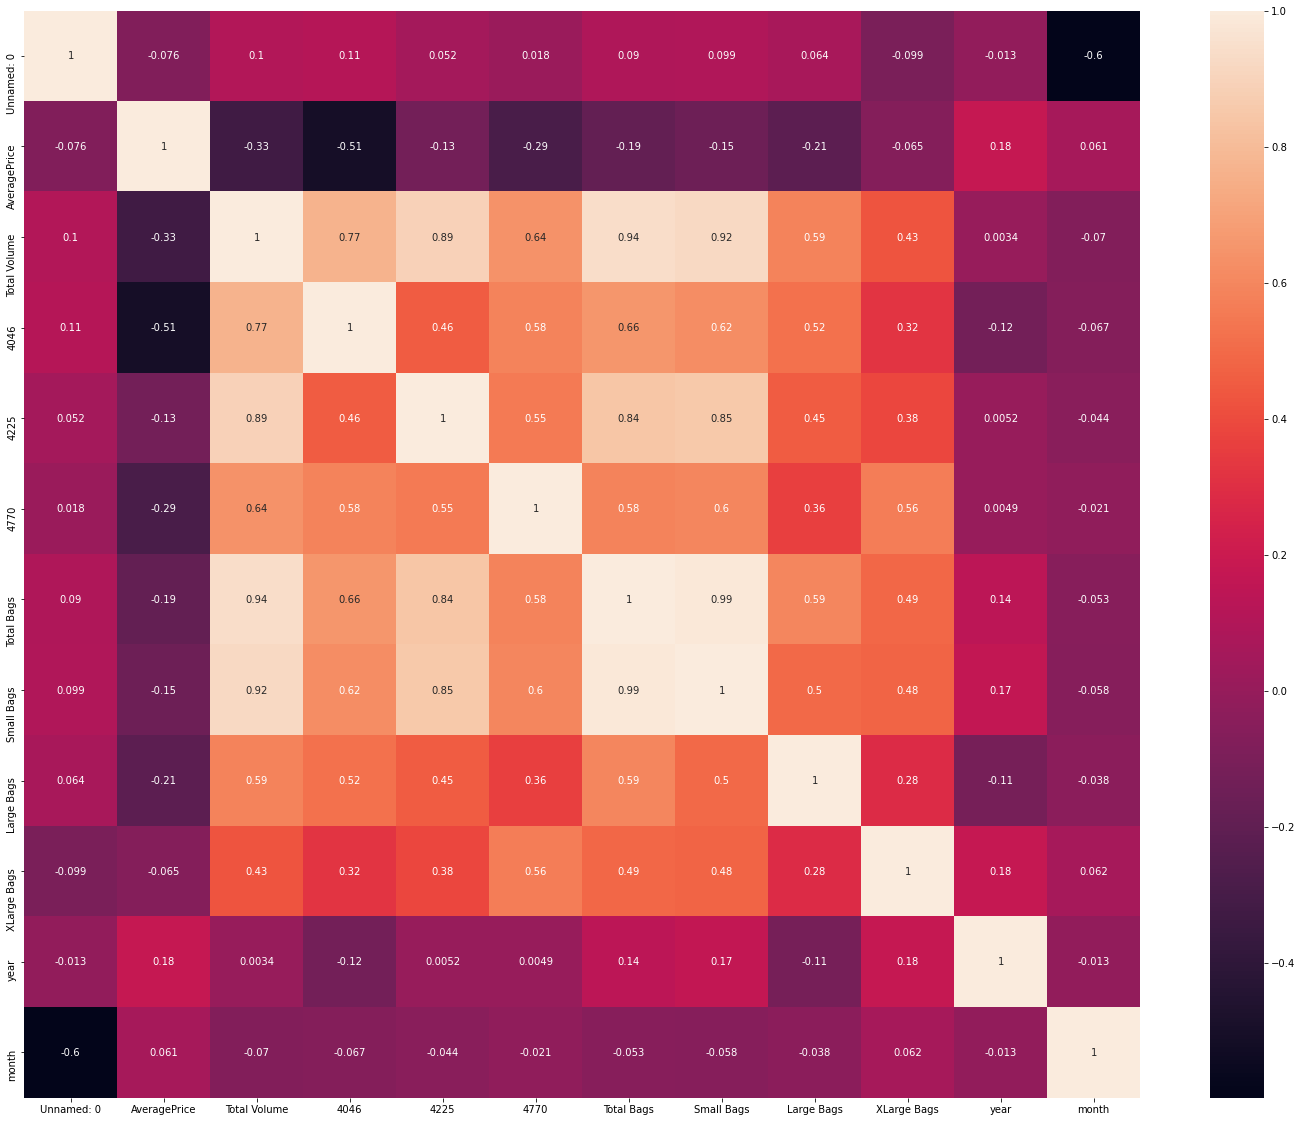

In [60]:
#finding corelation value of each column
df_cor=df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(df_cor,annot=True)
plt.plot()

#### So, from the above we came to know that there are so many outliers in the data.Now we will remove all the outliers in the next step.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
 14  month         1517 non-null   int64  
dtypes: float64(11), int64(1), object(3)
memory usage: 229.6+ KB


In [63]:
indexNames = df.loc[ (df['region'].isin(['Midsouth', 'Northeast','Southeast','West','TotalUS', 'Plains', 'California', 'SouthCentral', 'GreatLakes']))].index

volume_ranking=df.groupby(["region"])[['Total Volume']].sum().sort_values(by='Total Volume', ascending=False)
volume_ranking

,Total Volume
region,
California,1185.357204
BaltimoreWashington,883.492683
Boston,818.645381
Albany,749.696653
Boise,733.657701
PhoenixTucson,721.869695
Atlanta,703.885872
NewYork,620.776543
SouthCentral,604.970752


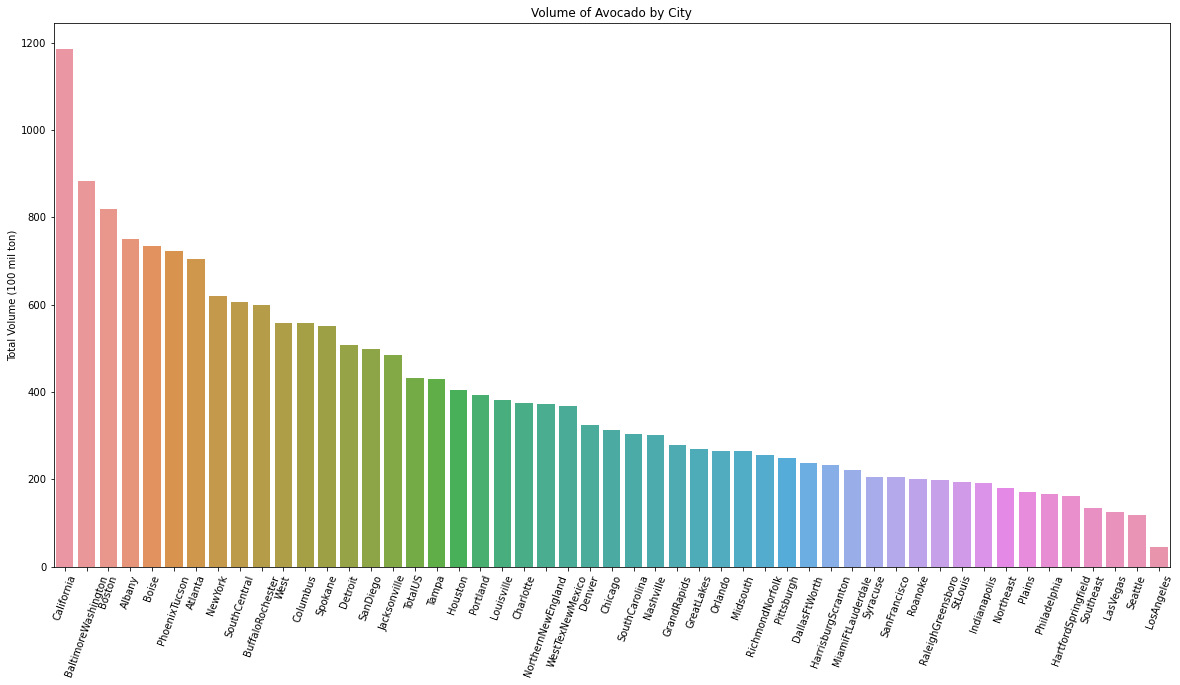

In [64]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=70)

ax = sns.barplot(x=volume_ranking.index, y="Total Volume", data=volume_ranking)
ax.set_xlabel("")
ax.set_ylabel("Total Volume (100 mil ton)")
plt.title('Volume of Avocado by City')
plt.savefig("city ranking")

##### Based on the below bar chart, suprisingly, Los Angeles consumes twice more than that of the second highest volume cities, New York.

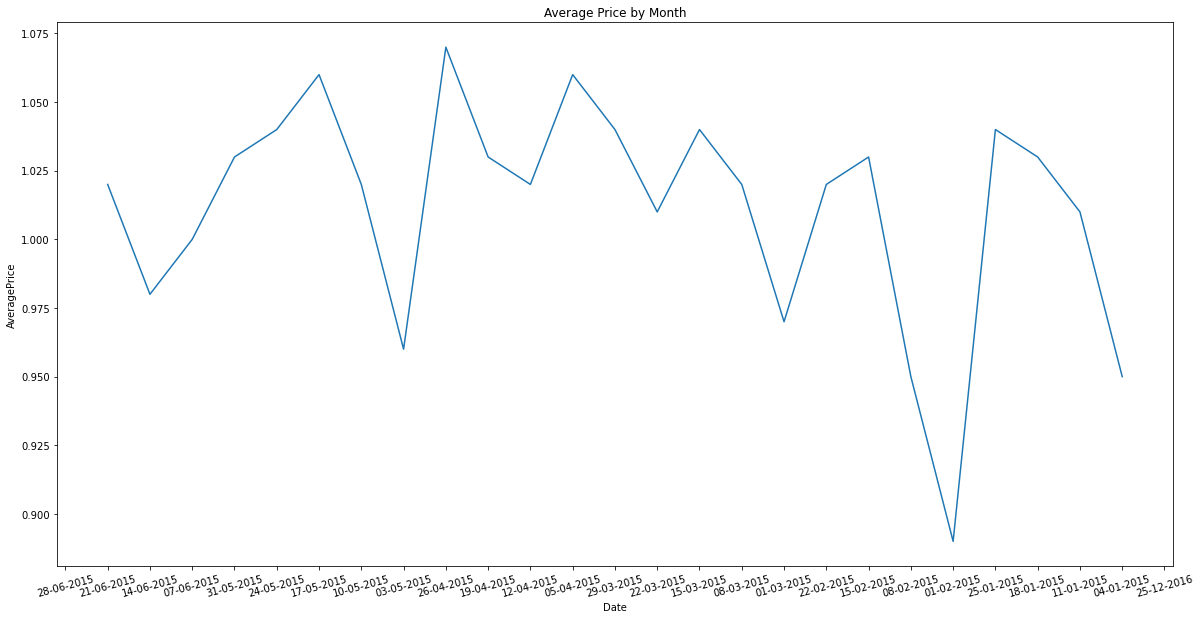

In [65]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df['Date'], y=df[df.region=='TotalUS']['AveragePrice'], data=df)
plt.xticks(rotation=15)
plt.title('Average Price by Month')

plt.show()

##### Graph shows that there was a huge drop in the price on 01/02/2015. The plot shows that it is increasing also

In [66]:
y_ = df[["AveragePrice"]]
X_ = df.drop(["AveragePrice"], axis=1)
print(X_.shape)
print(y_.shape)

(1517, 14)
(1517, 1)


In [67]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

ord_ = OrdinalEncoder()
ohe = OneHotEncoder(drop='first', sparse = False)
scaler = StandardScaler()

#dummify region column
region=pd.get_dummies(X_['region'], drop_first=True)
X_ = pd.concat( (X_.drop(["region"], axis=1).reset_index(drop = True), region), axis = 1 )

#Binary feature encoding; replacing the type {conventional, organic} into {0,1}
X_['type'] = X_['type'].astype(object)
X_['type']=X_['type'].replace({'conventional':0, 'organic':1})

## use standard scaler to standardize numeric columns

X_[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]=scaler.fit_transform(X_[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])

In [69]:
#Test and Train data split
np.random.seed(0)
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split( X_,y_, test_size = 0.2  )
